In [1]:
import pandas as pd
import numpy as np
import scipy.io

from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.colors as colors

In [4]:
welfare = pd.read_csv("../code/julia/welfare-US-%1.csv")

In [5]:
welfare.head()

,asset,shock,welfare
0,-2.00000,1.0,-0.005806
1,-1.89899,1.0,-0.004508
2,-1.79798,1.0,-0.003454
3,-1.69697,1.0,-0.002670
4,-1.59596,1.0,-0.001903


In [6]:
def create_grid(df,x,y,z):
    # 2D-arrays from DataFrame
    x1 = np.linspace(df[x].min(), df[x].max(), len(df[x].unique()))

    y1 = np.linspace(df[y].min(), df[y].max(), len(df[y].unique()))


    x2, y2 = np.meshgrid(x1, y1)

# Interpolate unstructured D-dimensional data.
    z2 = griddata((df[x], df[y]), df[z], (x2, y2), method='linear')
    
    return x2, y2, z2

C:\Users\mwaugh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\mwaugh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


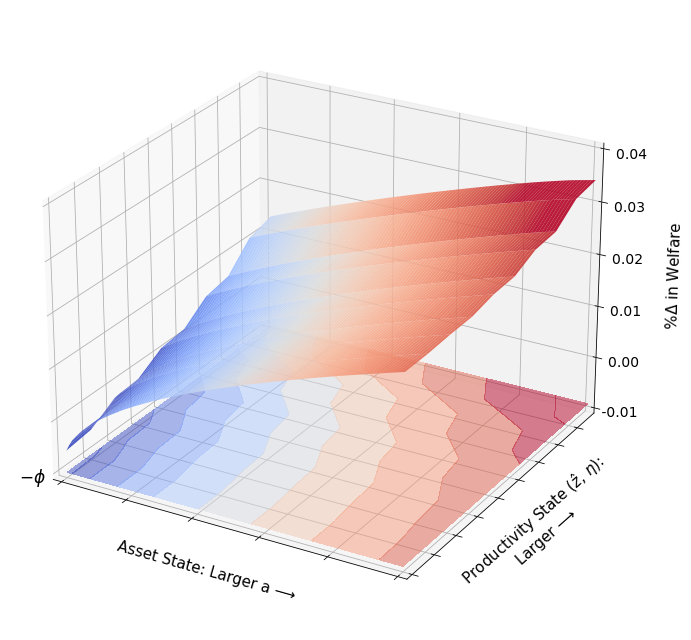

In [185]:
x, y, z = create_grid(welfare,"asset","shock","welfare")

fig = plt.figure(figsize = [15.0,9.0], tight_layout = True)

#ax = fig.gca(projection='3d')

ax = fig.add_subplot(projection='3d')

surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='coolwarm', norm=colors.Normalize(vmin=-0.001, vmax=0.03),
                    linewidth=0, antialiased=True, alpha = 0.90, linestyles = "dashed")

ofs = -.01

ax.contourf(x, y, z, 10, offset=ofs, cmap='coolwarm', norm=colors.Normalize(vmin=-0.001, vmax=0.03), 
                 alpha = 0.50, linestyles = "dashed")

ax.view_init(25,300)
ax.set_xlim(-2.05,8.05)
ax.set_xticklabels([])

ax.set_ylim(0.95,9.7)
ax.set_yticklabels([])

ax.set_zlim(-.01, 0.04)
ax.set_zticklabels(["   -0.01", "    0.00", "    0.01", "    0.02", "    0.03", "    0.04"], fontsize = 14)

ax.text(-2.75, 0.05, -0.01, "$-\phi$", fontsize = 17)

#ax.text(-2.95, 0.05, 0.024, "ACR -> \nRep Agent = 0.025", fontsize = 13)

# ax.text(-3.5, 0.25, 4.0, "$1 / \sigma_{\epsilon}$", fontsize = 17)

ax.set_ylabel("\n Productivity State ($\hat z$, $\eta$):\n Larger ⟶ ", fontsize = 15)
ax.set_xlabel("\n Asset State: Larger a ⟶ " , fontsize = 15)
ax.set_zlabel("\n \n \n \n %$\Delta$ in Welfare", fontsize = 15)

plt.savefig("../notes/figures/welfare-elasticity.pdf", bbox_inches = "tight")

plt.show()

In [100]:
trade = pd.read_csv("../code/julia/trade_model_data.csv")


In [101]:
trade.head()

,importer_index,experter_index,elasticity,trademodel,tradedata
0,1.0,1.0,NaN,-0.038829,-0.299547
1,2.0,1.0,-6.047809,-9.145333,-7.436905
2,3.0,1.0,-6.379918,-7.956314,-6.653952
3,4.0,1.0,-5.590606,-7.609470,-7.545801
4,5.0,1.0,-5.818689,-8.354681,-6.887979


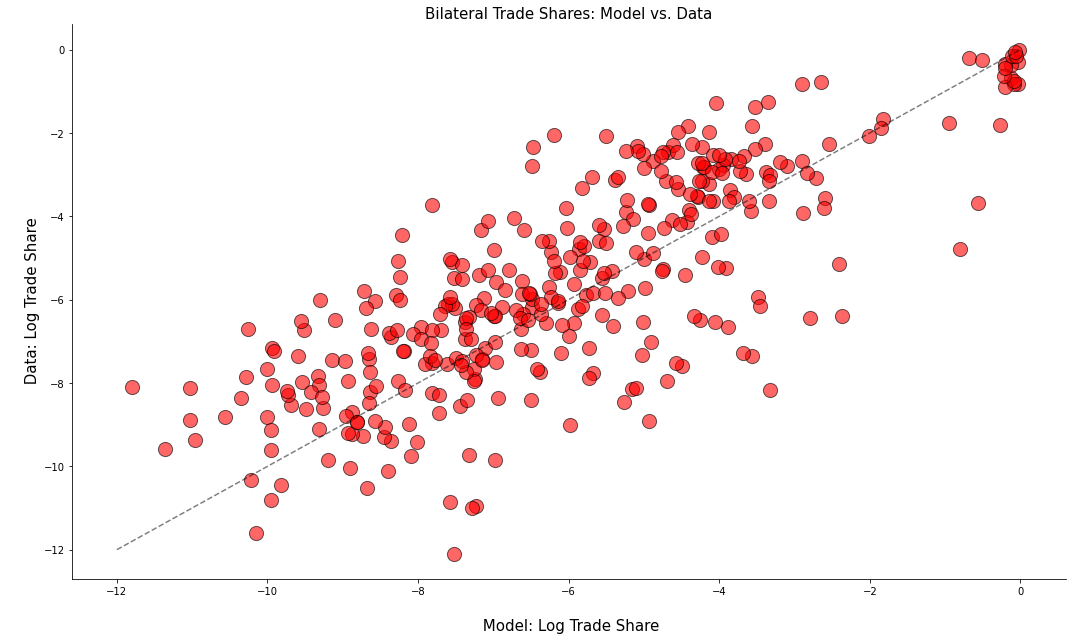

In [172]:
fig, ax = plt.subplots(figsize = [15.0,9.0], tight_layout = True)

ax.scatter(trade.trademodel, trade.tradedata, alpha = 0.60, c = "red", edgecolors = "black", s = 200)

ax.plot(range(-12,1), range(-12,1), alpha = 0.50, linestyle = "--", c = "black")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_title("Bilateral Trade Shares: Model vs. Data", fontsize = 15)

ax.set_xlabel("\n Model: Log Trade Share", fontsize = 15)
ax.set_ylabel("\n Data: Log Trade Share" , fontsize = 15)

plt.savefig("../notes/figures/trade-fit.pdf", bbox_inches = "tight")

plt.show()

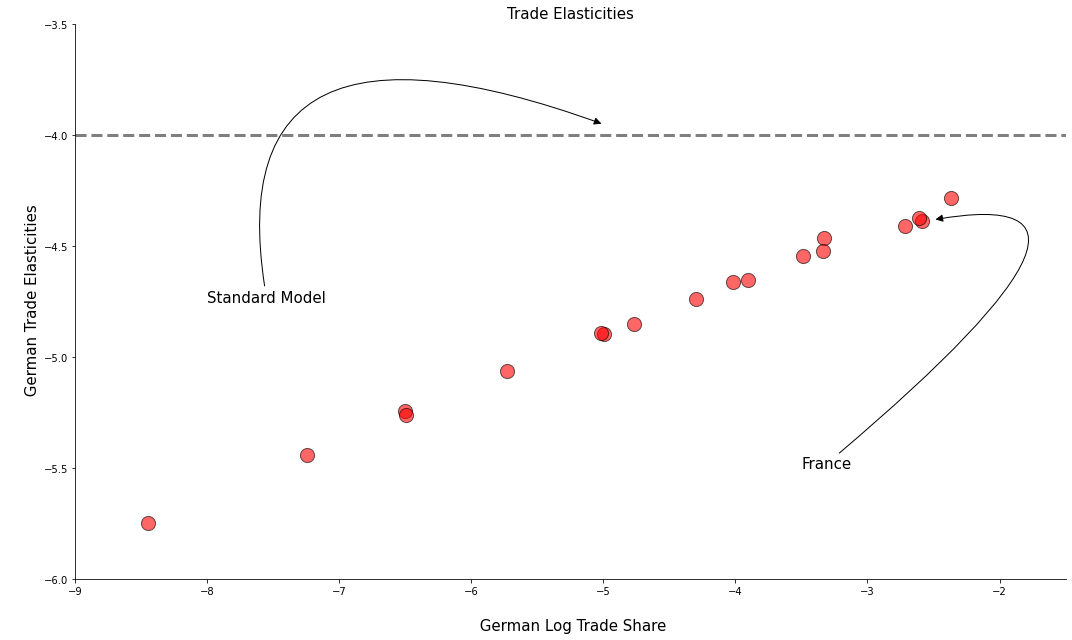

In [174]:
germany = trade[trade.importer_index == 8.0]

fig, ax = plt.subplots(figsize = [15.0,9.0], tight_layout = True)

ax.scatter(germany.trademodel, germany.elasticity, alpha = 0.60, c = "red", edgecolors = "black", s = 200)

ax.plot(range(-9,0), -4.0*np.ones(len(range(-9,0))), alpha = 0.50, linestyle = "--", c = "black", linewidth = 3.0)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_ylim(-6.0,-3.5)
ax.set_xlim(-9.0,-1.5)

ax.set_title("Trade Elasticities", fontsize = 15)

ax.set_xlabel("\n German Log Trade Share", fontsize = 15)
ax.set_ylabel("\n German Trade Elasticities" , fontsize = 15)

ax.annotate(
    "France", 
    xy=(-2.5, -4.38), # This is where we point at...
    xycoords="data", # Not exactly sure about this
    xytext=(-3.5, -5.5), # This is about where the text is
    horizontalalignment="left", # How the text is alined
    arrowprops={
        "arrowstyle": "-|>", # This is stuff about the arrow
        "connectionstyle": "angle3,angleA=40,angleB=10",
        "color": "black"
    },
    fontsize=15,
)

ax.annotate(
    "Standard Model", 
    xy=(-5, -3.95), # This is where we point at...
    xycoords="data", # Not exactly sure about this
    xytext=(-8.0, -4.75), # This is about where the text is
    horizontalalignment="left", # How the text is alined
    arrowprops={
        "arrowstyle": "-|>", # This is stuff about the arrow
        "connectionstyle": "angle3,angleA=100,angleB=-20",
        "color": "black"
    },
    fontsize=15,
)


plt.savefig("../notes/figures/german-trade-elasticities.pdf", bbox_inches = "tight")

plt.show()


In [120]:
np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])